In [728]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

In [729]:
# file = "test.dat"
# file = "test2.dat"
# file = "test3.dat"
# file = "test4.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n')
# np row major
raw_maze = np.array([list(line) for line in lines])
raw_height, raw_width = raw_maze.shape[0], raw_maze.shape[1]
maze = np.full((raw_height+2, raw_width+2), '.')
maze[1:1+raw_height, 1:1+raw_width] = raw_maze
height, width = maze.shape[0], maze.shape[1]

In [730]:
for row in range(maze.shape[0]):
    for col in range(maze.shape[1]):
        print(maze[row,col],end='')
    print()

..............................................................................................................................................
.|-F7|77FJ-J7..L.-7-7.F--7-J7-FJ7|.FFFF7F-|7|7.J.-|7--F|-LL---77FF--7-|-LF77F|7FF-JFF7FJ-|7F.F7FFL-J7FFL-J-7-FFF7JF|-L77|-F7.FL7F7-7.7.FLF-F7.
.7.L|.LJJ.LLL7L-LJ|L--J7FL|LF7.LJL77.7--J7LFL|.L.L7JJF7JJ|JFLFFJ7|J|F-LF-||FF|7F7|-7.7-J7|FJ.|L7--7J-L7||J--.||LJ.FLJ.-LJL-JJ7JF7L7|L7F77L777.
.--FL7FJ-7.||J.L||LFL-|--7L7L-7|LF77.|L|.7-|JL7F7J|...L7FJ77--7|||F-|J7LL|L-7F7|LJ.|LJ|.L-FJ.FFLJF|JL7|FL-L|FL|.FFJL-7J.LF|-L--777LFJL|LJ-|J7.
.FL|--JJJ|7-7F--JJ-7.|L7.|FL-F|FF||F-7.LF.L7.|LLJF77FJ|F|7|.7FLFF-J.7-7-LL7FJ||7.LFLJ7FJ.7JL7-7|--JLFL-L-7-F|-JF777F-J||--JF77.JL7-|.FJF|.LJ-.
.-7JFJ|--J|L7JF7-|J|-FLJ7--LF7F--J||FJF7JLFJFJFJFFJ|7|LF7JLLJJ|FJ7J||LF.F-J|FJL77F||FF7|F777|JLF7...|L7FF-7.F-|JJ.FL..LJ-JF|L7L7F-7F--J-L-7J..
.|JF-JL7LF|.|.-7LJ-F-7|.|7FF||L7F-J||FJL7J|---L77J.||FJ||L|LJJ|L|L-777F7L7FJL-7L7F777|L7F---7J.|J-FF7-J--JLF|J.|FJ--|-.L-FF7.JFLJ7|J.L7J.|||F.


    | is a vertical pipe connecting north and south.
    - is a horizontal pipe connecting east and west.
    L is a 90-degree bend connecting north and east.
    J is a 90-degree bend connecting north and west.
    7 is a 90-degree bend connecting south and west.
    F is a 90-degree bend connecting south and east.
    . is ground; there is no pipe in this tile.
    S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.

In [731]:
G = nx.DiGraph()
for row in range(height):
    for col in range(width):
        x, y = col, height-row-1
        G.add_node((x,y), pos=(x,y)) 
        match maze[row,col]:
            case '.':
                pass
            case '|': # north, south
                G.add_edge((x,y),(x,y+1))
                G.add_edge((x,y),(x,y-1))
            case '-': # east, west  
                G.add_edge((x,y),(x+1,y))
                G.add_edge((x,y),(x-1,y))
            case 'L': # north, east
                G.add_edge((x,y),(x,y+1))
                G.add_edge((x,y),(x+1,y))
            case 'J': # north, west
                G.add_edge((x,y),(x,y+1))
                G.add_edge((x,y),(x-1,y))
            case'7': # south, west
                G.add_edge((x,y),(x,y-1))
                G.add_edge((x,y),(x-1,y))
            case'F': # south, east
                G.add_edge((x,y),(x,y-1))
                G.add_edge((x,y),(x+1,y))
            case 'S':
                start_node = (x,y)

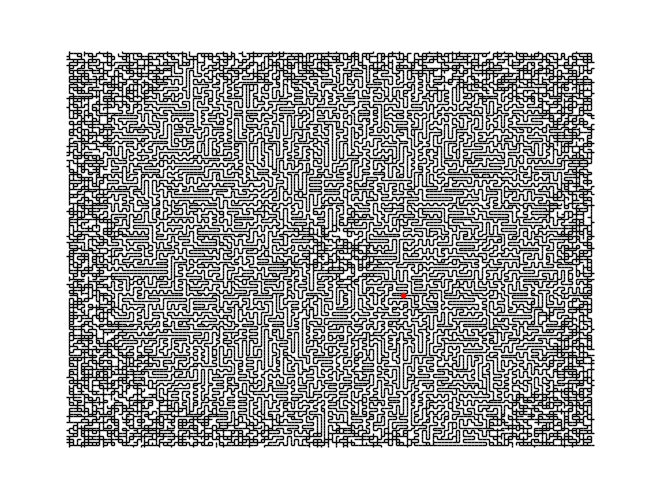

<Figure size 14200x14200 with 0 Axes>

In [732]:
pos = nx.get_node_attributes(G, 'pos')

# # Default position for nodes without coordinates, which means I made a mistake if there is one
# default_pos = (maze.shape[1]/2, maze.shape[0]/2) 
# pos = {node: attrs.get('pos', default_pos) for node, attrs in G.nodes(data=True)}
undirected_G = G.to_undirected()
nx.draw(undirected_G, pos, node_color='None', with_labels=False)
nx.draw_networkx_nodes(undirected_G, pos, nodelist=[start_node], node_color='r', node_size=10,)
figsize = (maze.shape[1], maze.shape[0])
plt.figure(figsize=figsize)
plt.show()


In [733]:
# magic needed from Reddit. Couldn't solve this myself
neighbors = list(G.in_edges(start_node))
G.add_edge(start_node, neighbors[0][0])
print("Start node is", start_node)  
print(neighbors[0][0])
# had to add the edge above to get the right answer
# i think we basically had to reverse one of the edges connected to the start node
# because the way it is built up, the start node has two incoming edges


Start node is (90, 54)
(89, 54)


In [734]:
print("Start node is", start_node)  
cycles = nx.find_cycle(G, source=start_node)
print("Cycle from start node is:", cycles)

# make new graph with only nodes in cycles
H = nx.Graph()
H.add_edges_from(cycles)
for node in H.nodes():
    x, y = node
    H.nodes[node]['pos'] = (x, y)
# for node in G.nodes(data=True):
#     H.add_node(node[0], **node[1])


Start node is (90, 54)
Cycle from start node is: [((90, 54), (89, 54)), ((89, 54), (90, 54))]


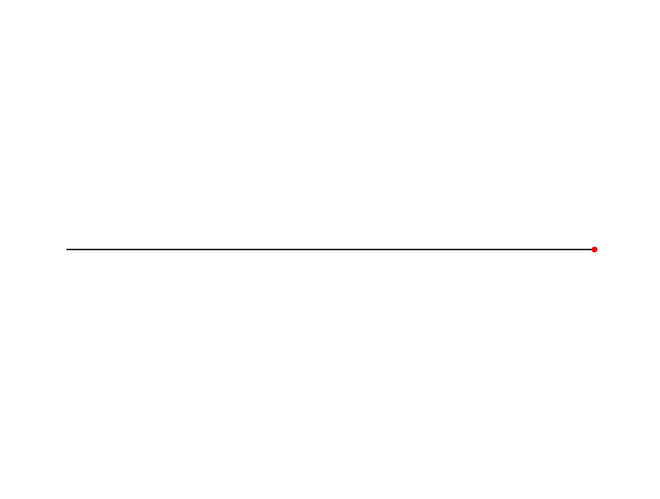

In [735]:
# pos = nx.get_node_attributes(G, 'pos')

# Default position for nodes without coordinates, which means I made a mistake if there is one
default_pos = (maze.shape[1]//2, maze.shape[0]//2) 
pos = {node: attrs.get('pos', default_pos) for node, attrs in H.nodes(data=True)}
nx.draw(H, pos, with_labels=False, node_color='None', node_size=10)
nx.draw_networkx_nodes(H, pos, nodelist=[start_node], node_color='r', node_size=10)
plt.show()

In [736]:
shortest_paths = nx.single_source_shortest_path_length(G, source=start_node)

max_distance_node = max(shortest_paths, key=shortest_paths.get)
max_distance = shortest_paths[max_distance_node]

print("Start node is:", start_node)
print("Node with the greatest distance from the start node:", max_distance_node)
print("Distance from the start node:", max_distance)

# 399 is too low
# # correct answer is 7012
print("Answer is:", int(np.ceil(max_distance/2)))


Start node is: (90, 54)
Node with the greatest distance from the start node: (91, 54)
Distance from the start node: 14023
Answer is: 7012
